# Table of Contents
- [Import Library](#import-library)
- [Read In CSV](#read-in-csv)

## Import Library

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

## Read In CSV

In [2]:
eth = pd.read_csv('./data/ohlcv_daily.csv')

In [59]:
eth.fillna(eth.mean(), inplace=True)

# Train Model

## Neural Network 1

In [177]:
predictor_values = ['close', 'volume', 'open', 'high', 'low', 'edit_count', 'sentiment', 'negative_sentiment', 'tomorrow']

X = eth[predictor_values]
y = eth['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_shape = (X_train_scaled.shape[1],)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, 
                    epochs=500, 
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stop])

Epoch 1/500
57/57 [==============================] - 1s 5ms/step - loss: 0.7011 - accuracy: 0.4989 - val_loss: 0.6894 - val_accuracy: 0.4967
Epoch 2/500
57/57 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5177 - val_loss: 0.6903 - val_accuracy: 0.5166
Epoch 3/500
57/57 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5089 - val_loss: 0.6875 - val_accuracy: 0.5477
Epoch 4/500
57/57 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5244 - val_loss: 0.6895 - val_accuracy: 0.5100
Epoch 5/500
57/57 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5327 - val_loss: 0.6887 - val_accuracy: 0.5011
Epoch 6/500
57/57 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5305 - val_loss: 0.6872 - val_accuracy: 0.5410
Epoch 7/500
57/57 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5266 - val_loss: 0.6842 - val_accuracy: 0.5721
Epoch 8/500
5

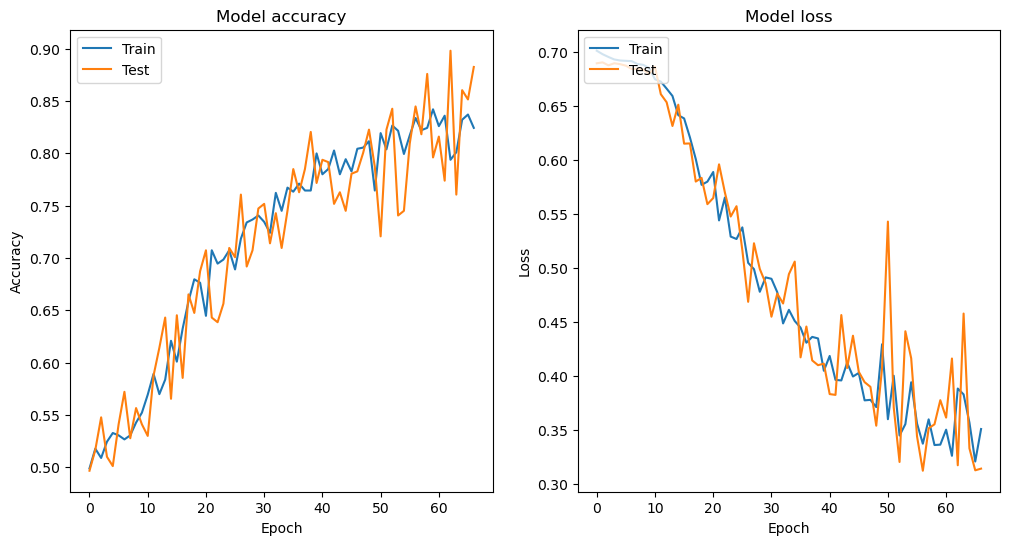

Final Test Accuracy: 88.25%


In [178]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

final_acc = history.history['val_accuracy'][-1]
final_acc = final_acc * 100
print(f"Final Test Accuracy: {final_acc:.2f}%")

## Neural Network 2

In [160]:
predictor_values = ['close', 'volume', 'open', 'high', 'low', 'edit_count', 'sentiment', 'negative_sentiment', 'tomorrow']

X = eth[predictor_values]
y = eth['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_shape = (X_train_scaled.shape[1],)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), activity_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, 
                    epochs=500, 
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stop])

Epoch 1/500
57/57 [==============================] - 1s 5ms/step - loss: 3.2215 - accuracy: 0.5366 - val_loss: 2.3043 - val_accuracy: 0.5011
Epoch 2/500
57/57 [==============================] - 0s 3ms/step - loss: 2.6254 - accuracy: 0.5632 - val_loss: 2.0680 - val_accuracy: 0.4922
Epoch 3/500
57/57 [==============================] - 0s 3ms/step - loss: 2.3552 - accuracy: 0.5554 - val_loss: 1.8899 - val_accuracy: 0.5055
Epoch 4/500
57/57 [==============================] - 0s 3ms/step - loss: 2.1276 - accuracy: 0.5665 - val_loss: 1.7575 - val_accuracy: 0.4989
Epoch 5/500
57/57 [==============================] - 0s 2ms/step - loss: 1.8988 - accuracy: 0.6086 - val_loss: 1.6297 - val_accuracy: 0.5255
Epoch 6/500
57/57 [==============================] - 0s 3ms/step - loss: 1.7947 - accuracy: 0.5948 - val_loss: 1.5352 - val_accuracy: 0.5432
Epoch 7/500
57/57 [==============================] - 0s 3ms/step - loss: 1.5603 - accuracy: 0.6391 - val_loss: 1.4451 - val_accuracy: 0.5698
Epoch 8/500
5

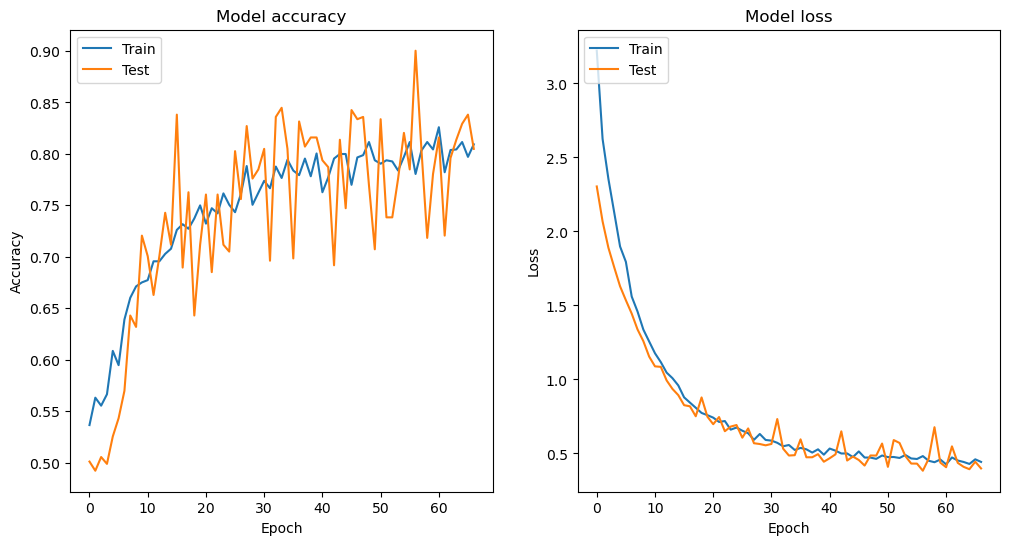

Final Test Accuracy: 80.49%


In [161]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

final_acc = history.history['val_accuracy'][-1]
final_acc = final_acc * 100
print(f"Final Test Accuracy: {final_acc:.2f}%")

Both neural networks that were architectured achieved 80% or greater in predicting price movement